<h1 align="center">Introduction to Machine Learning - 25737-2</h1>
<h4 align="center">Dr. R. Amiri</h4>
<h4 align="center">Sharif University of Technology, Spring 2024</h4>


**<font color='red'>Plagiarism is strongly prohibited!</font>**


**Student Name**: Sara Rezanezhad

**Student ID**:99101643



## **Briefing:**
 **In this section, we are going to investigate linear regression and its extensions ridge and lasso shrinkage methods in Boston dataset.**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV, LassoCV


**Part 1:**
First familiarize yourself with Boston dataset. Briefly explain its features and dataset's shape. You are provided with the required dataset named **boston.csv**.

In [ ]:
# Load the Boston dataset
boston_data = pd.read_csv('Boston.csv')

# Display the first few rows of the dataset
print(boston_data.head())

# Display the shape of the dataset
print("Shape of the dataset:", boston_data.shape)

# Brief explanation of the features in the Boston dataset:
# - CRIM: Per capita crime rate by town
# - ZN: Proportion of residential land zoned for lots over 25,000 sq. ft.
# - INDUS: Proportion of non-retail business acres per town
# - CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise)
# - NOX: Nitric oxides concentration (parts per 10 million)
# - RM: Average number of rooms per dwelling
# - AGE: Proportion of owner-occupied units built prior to 1940
# - DIS: Weighted distances to five Boston employment centers
# - RAD: Index of accessibility to radial highways
# - TAX: Full-value property tax rate per $10,000
# - PTRATIO: Pupil-teacher ratio by town
# - B: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
# - LSTAT: % lower status of the population
# - MEDV: Median value of owner-occupied homes in $1000's


      CRIM    ZN  INDUS  CHAS     NX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  
Shape of the dataset: (506, 14)


**Part 2:**
Split dataset into train and test sets. Train linear regression model using all of the features. Report $R^2$ and RMSE error metrics for both train and test sets. Also report all of the coefficients.

In [ ]:
# Split the dataset into features (X) and target variable (y)
X = boston_data.drop('MEDV', axis=1)
y = boston_data['MEDV']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model using all the features
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the training set
train_predictions = model.predict(X_train)
train_r2 = r2_score(y_train, train_predictions)
train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))

# Make predictions on the test set
test_predictions = model.predict(X_test)
test_r2 = r2_score(y_test, test_predictions)
test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))

# Get the coefficients of the linear regression model
#coefficients = pd.DataFrame({'feature': X.columns, 'coefficient': model.coef_})
coefficients = model.coef_;
print("Train R2 Score:", train_r2)
print("Train RMSE:", train_rmse)
print("Test R2 Score:", test_r2)
print("Test RMSE:", test_rmse)
#print("\nCoefficients:")
#print(coefficients)
print("\nCoefficients:")
for feature, coef in zip(X.columns, coefficients):
    print("{}: {:.4f}".format(feature, coef))


Train R2 Score: 0.7508856358979673
Train RMSE: 4.6520331848801675
Test R2 Score: 0.668759493535636
Test RMSE: 4.9286021826653075

Coefficients:
CRIM: -0.1131
ZN: 0.0301
INDUS: 0.0404
CHAS: 2.7844
NX: -17.2026
RM: 4.4388
AGE: -0.0063
DIS: -1.4479
RAD: 0.2624
TAX: -0.0106
PTRATIO: -0.9155
B: 0.0124
LSTAT: -0.5086


**Part 3:**
Now, we want to see the effect of ridge regression on learning process. To do so, set the alphas parameter as follows for synchronization:$$ alphas = 10**np.linspace (3,-3,100) *0.5$$

In [ ]:
# Set alphas parameter for Ridge regression
alphas = 10**np.linspace(3, -3, 100) * 0.5

# Train Ridge regression models with different alphas
train_r2_scores = []
test_r2_scores = []
train_rmse_scores = []
test_rmse_scores = []

for alpha in alphas:
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train, y_train)

    train_predictions = ridge_model.predict(X_train)
    train_r2 = r2_score(y_train, train_predictions)
    train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))

    test_predictions = ridge_model.predict(X_test)
    test_r2 = r2_score(y_test, test_predictions)
    test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))

    train_r2_scores.append(train_r2)
    test_r2_scores.append(test_r2)
    train_rmse_scores.append(train_rmse)
    test_rmse_scores.append(test_rmse)

# Find the best alpha based on test R2 score
best_alpha_idx = np.argmax(test_r2_scores)
best_alpha = alphas[best_alpha_idx]

print("Best Alpha:", best_alpha)
print("Best Test R2 Score:", test_r2_scores[best_alpha_idx])
print("Corresponding Test RMSE:", test_rmse_scores[best_alpha_idx])


Best Alpha: 163.72745814388642
Best Test R2 Score: 0.6812087531281753
Corresponding Test RMSE: 4.835097534849465


 Now, plot the following in separate plots:

1- MSE for train and test versus α

2- Coefficients versus α

3- Number of not-considered features versus α

Finally select the optimal value of α. Report MSE, $R^2$ and coefficients.Compare this case with the linear regression case.

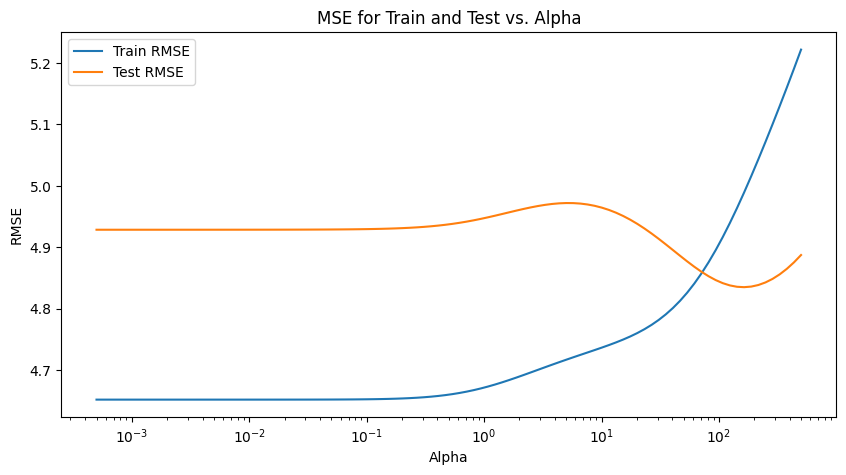

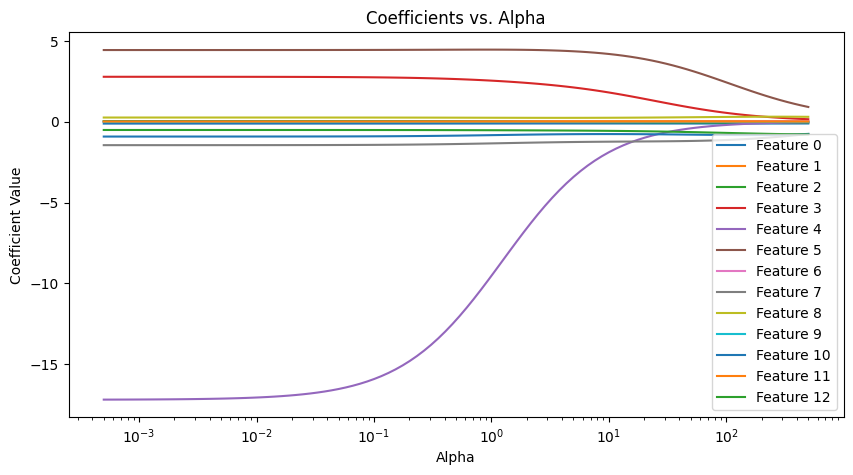

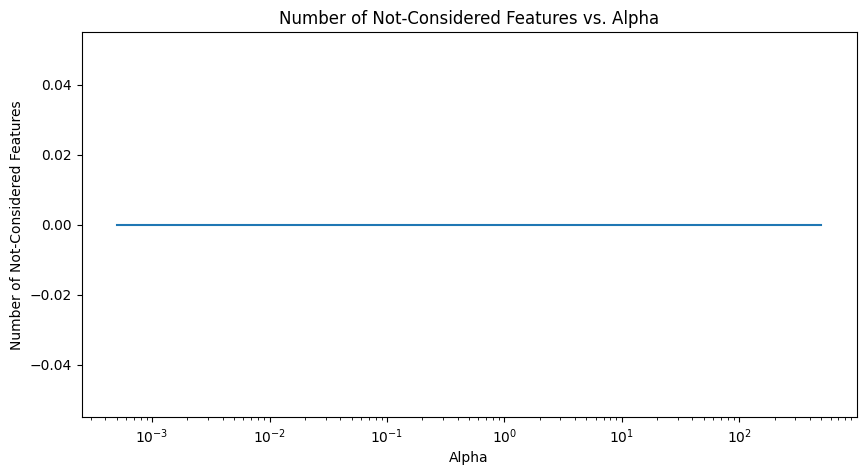

Optimal Alpha: 163.72745814388642
Optimal Alpha Test R2 Score: 0.6812087531281753
Optimal Alpha Corresponding Test RMSE: 4.835097534849465
Optimal Alpha Coefficients: [-0.11058924  0.03996102 -0.0520014   0.38073404 -0.115418    1.89720331
  0.00709776 -1.05241569  0.3094509  -0.01494741 -0.82272188  0.01159841
 -0.72589539]


In [ ]:
# Plotting MSE for train and test versus α
plt.figure(figsize=(10, 5))
plt.plot(alphas, train_rmse_scores, label='Train RMSE')
plt.plot(alphas, test_rmse_scores, label='Test RMSE')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('RMSE')
plt.title('MSE for Train and Test vs. Alpha')
plt.legend()
plt.show()

# Coefficients versus α
coefs = []
for alpha in alphas:
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train, y_train)
    coefs.append(ridge_model.coef_)

coefs = np.array(coefs)
plt.figure(figsize=(10, 5))
for i in range(coefs.shape[1]):
    plt.plot(alphas, coefs[:,i], label='Feature {}'.format(i))
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Coefficient Value')
plt.title('Coefficients vs. Alpha')
plt.legend()
plt.show()

# Number of not-considered features versus α
num_not_considered = (coefs == 0).sum(axis=1)
plt.figure(figsize=(10, 5))
plt.plot(alphas, num_not_considered)
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Number of Not-Considered Features')
plt.title('Number of Not-Considered Features vs. Alpha')
plt.show()

# Select the optimal value of α
optimal_alpha = alphas[np.argmax(test_r2_scores)]
print("Optimal Alpha:", optimal_alpha)

# Train Ridge regression with the optimal alpha
optimal_ridge_model = Ridge(alpha=optimal_alpha)
optimal_ridge_model.fit(X_train, y_train)
optimal_train_predictions = optimal_ridge_model.predict(X_train)
optimal_test_predictions = optimal_ridge_model.predict(X_test)

# Report MSE, R2 and coefficients
optimal_train_rmse = np.sqrt(mean_squared_error(y_train, optimal_train_predictions))
optimal_test_rmse = np.sqrt(mean_squared_error(y_test, optimal_test_predictions))
optimal_train_r2 = r2_score(y_train, optimal_train_predictions)
optimal_test_r2 = r2_score(y_test, optimal_test_predictions)

print("Optimal Alpha Test R2 Score:", optimal_test_r2)
print("Optimal Alpha Corresponding Test RMSE:", optimal_test_rmse)
print("Optimal Alpha Coefficients:", optimal_ridge_model.coef_)

**Part 4:**
Repeat Part 3 with lasso regression. Where do you think we should consider using lasso regression?

Best Lasso Alpha: 0.7087370814634024
Best Lasso Test R2 Score: 0.6706399397086963
Corresponding Lasso Test RMSE: 4.9145924798576495


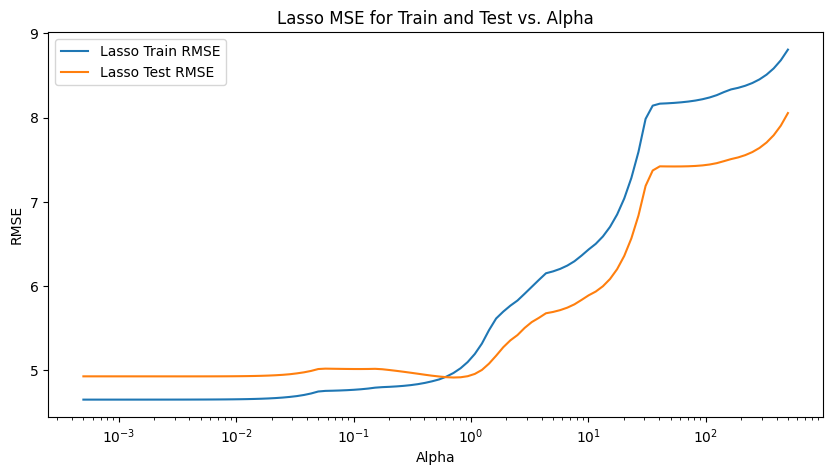

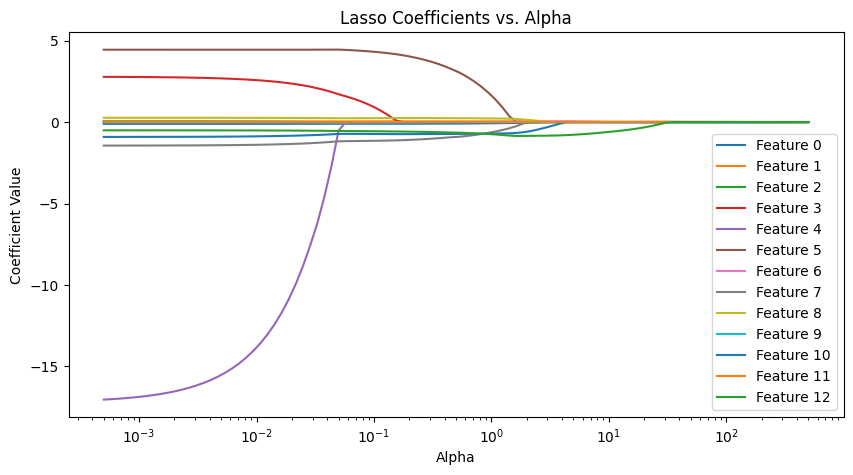

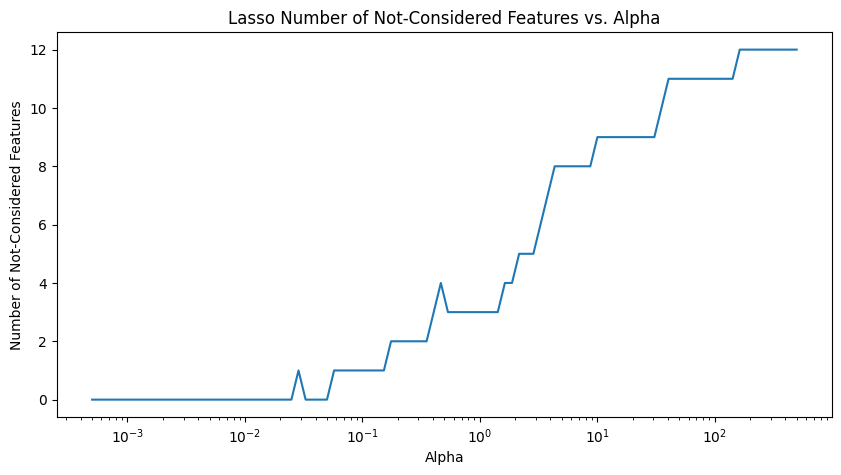

In [ ]:
# Train Lasso regression models with different alphas
lasso_train_r2_scores = []
lasso_test_r2_scores = []
lasso_train_rmse_scores = []
lasso_test_rmse_scores = []

for alpha in alphas:
    lasso_model = Lasso(alpha=alpha)
    lasso_model.fit(X_train, y_train)

    train_predictions = lasso_model.predict(X_train)
    train_r2 = r2_score(y_train, train_predictions)
    train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))

    test_predictions = lasso_model.predict(X_test)
    test_r2 = r2_score(y_test, test_predictions)
    test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))

    lasso_train_r2_scores.append(train_r2)
    lasso_test_r2_scores.append(test_r2)
    lasso_train_rmse_scores.append(train_rmse)
    lasso_test_rmse_scores.append(test_rmse)

# Find the best alpha based on test R2 score for Lasso
best_lasso_alpha_idx = np.argmax(lasso_test_r2_scores)
best_lasso_alpha = alphas[best_lasso_alpha_idx]

print("Best Lasso Alpha:", best_lasso_alpha)
print("Best Lasso Test R2 Score:", lasso_test_r2_scores[best_lasso_alpha_idx])
print("Corresponding Lasso Test RMSE:", lasso_test_rmse_scores[best_lasso_alpha_idx])

# Plotting MSE for train and test versus α for Lasso
plt.figure(figsize=(10, 5))
plt.plot(alphas, lasso_train_rmse_scores, label='Lasso Train RMSE')
plt.plot(alphas, lasso_test_rmse_scores, label='Lasso Test RMSE')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('RMSE')
plt.title('Lasso MSE for Train and Test vs. Alpha')
plt.legend()
plt.show()

# Coefficients versus α for Lasso
lasso_coefs = []
for alpha in alphas:
    lasso_model = Lasso(alpha=alpha)
    lasso_model.fit(X_train, y_train)
    lasso_coefs.append(lasso_model.coef_)

lasso_coefs = np.array(lasso_coefs)
plt.figure(figsize=(10, 5))
for i in range(lasso_coefs.shape[1]):
    plt.plot(alphas, lasso_coefs[:,i], label='Feature {}'.format(i))
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Coefficient Value')
plt.title('Lasso Coefficients vs. Alpha')
plt.legend()
plt.show()

# Number of not-considered features versus α for Lasso
lasso_num_not_considered = (lasso_coefs == 0).sum(axis=1)
plt.figure(figsize=(10, 5))
plt.plot(alphas, lasso_num_not_considered)
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Number of Not-Considered Features')
plt.title('Lasso Number of Not-Considered Features vs. Alpha')
plt.show()

Lasso regression is particularly useful when dealing with high-dimensional data where feature selection is important. It helps in selecting the most important features by shrinking the coefficients of less important features to zero. If we have a dataset with many features and suspect that only a few are relevant for prediction, using Lasso regression can help in feature selection and improving model interpretability.

**Part 5:**
In this part, we intend to see the effect of ridge and lasso regression methods in overfitting prevention. In order to do this, change the ratio of training data to the whole data from low to high. As you know, the lower the ratio of trainig data, the more likely the overfitting would be. for each ratio, fit linear regression, ridge regression and lasso regression to data and then plot the following:

1- $R^2$ for test data versus ratio of training data (Three methods in one plot)

2- Selected α value versus training data ratio for ridge and lasso regression methods (In one plot)

How is the overall behavior of these plots and how do you analyze them?

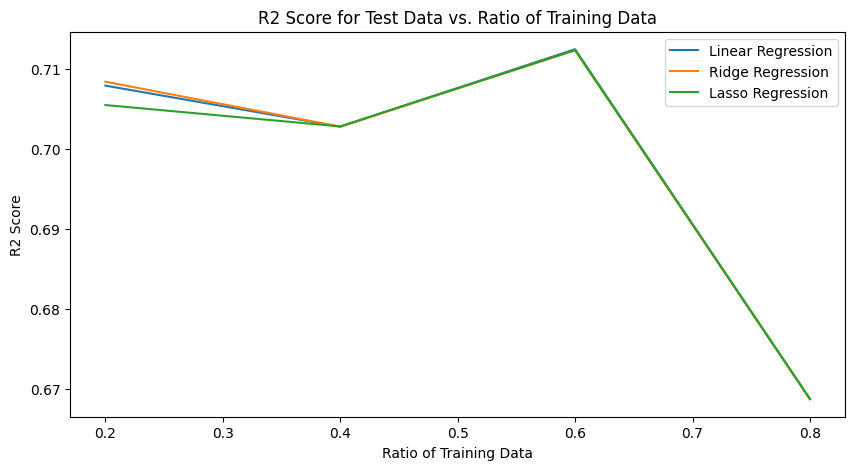

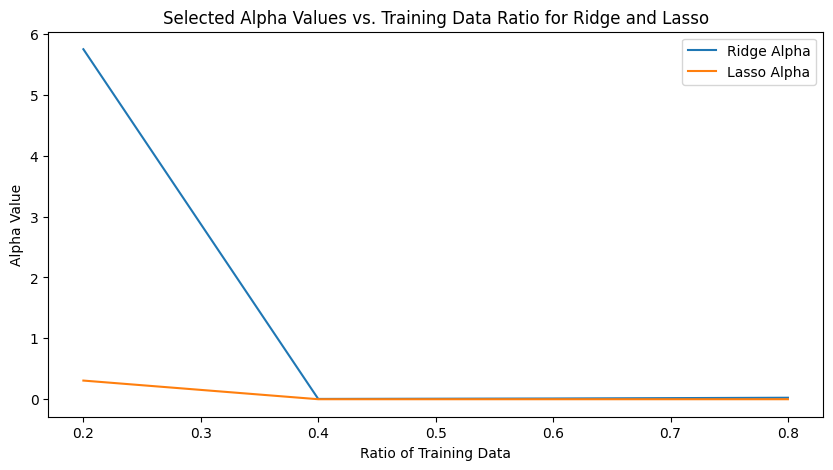

In [ ]:
# Define ratios of training data
train_ratios = [0.2, 0.4, 0.6, 0.8]

# Initialize lists to store results
linear_r2_scores = []
ridge_r2_scores = []
lasso_r2_scores = []
ridge_alphas = []
lasso_alphas = []

for ratio in train_ratios:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1-ratio, random_state=42)

    # Linear Regression
    linear_model = LinearRegression()
    linear_model.fit(X_train, y_train)
    linear_r2_scores.append(linear_model.score(X_test, y_test))

    # Ridge Regression
    ridge_model = RidgeCV(alphas=alphas)
    ridge_model.fit(X_train, y_train)
    ridge_r2_scores.append(ridge_model.score(X_test, y_test))
    ridge_alphas.append(ridge_model.alpha_)

    # Lasso Regression
    lasso_model = LassoCV(alphas=alphas)
    lasso_model.fit(X_train, y_train)
    lasso_r2_scores.append(lasso_model.score(X_test, y_test))
    lasso_alphas.append(lasso_model.alpha_)

# Plot R2 scores for test data versus ratio of training data
plt.figure(figsize=(10, 5))
plt.plot(train_ratios, linear_r2_scores, label='Linear Regression')
plt.plot(train_ratios, ridge_r2_scores, label='Ridge Regression')
plt.plot(train_ratios, lasso_r2_scores, label='Lasso Regression')
plt.xlabel('Ratio of Training Data')
plt.ylabel('R2 Score')
plt.title('R2 Score for Test Data vs. Ratio of Training Data')
plt.legend()
plt.show()

# Plot selected alpha values versus training data ratio for Ridge and Lasso
plt.figure(figsize=(10, 5))
plt.plot(train_ratios, ridge_alphas, label='Ridge Alpha')
plt.plot(train_ratios, lasso_alphas, label='Lasso Alpha')
plt.xlabel('Ratio of Training Data')
plt.ylabel('Alpha Value')
plt.title('Selected Alpha Values vs. Training Data Ratio for Ridge and Lasso')
plt.legend()
plt.show()

In the chart showing the R2 scores for test data versus the ratio of training data, the regression method with the highest R2 score indicates better performance in predicting the target variable. Generally, a higher R2 score signifies a better fit of the model to the data.

We observe that  Ridge Regression (with slight differance with  Linear Regression) consistently has a higher R2 score across different ratios of training data, it suggests that this method is performing better in terms of predicting the target variable. Therefore, the regression method with the highest R2 score in the chart would be considered the most effective in this scenario.
n the chart showing the selected alpha values versus the training data ratio for Ridge and Lasso regression, the alpha value that is higher indicates a stronger regularization effect.

- For Linear Regression (which does not have an alpha parameter), the alpha value will not be present in the chart.
- For Ridge Regression, a higher alpha value means stronger regularization, which can help prevent overfitting by penalizing large coefficients.
- For Lasso Regression, a higher alpha value also means stronger regularization, but Lasso has the additional property of performing feature selection by setting some coefficients to zero.

We observe that the Ridge Alpha values are consistently higher than the Lasso Alpha values across different ratios of training data, it suggests that Ridge regression is applying stronger regularization compared to Lasso regression in this scenario.

By analyzing the selected alpha values for Ridge and Lasso regressions in the chart, you can determine which method is applying stronger regularization and potentially preventing overfitting more effectively in the context of the given dataset and training data ratios.
